# Words Correction and Word Matching Using Edit Distance, Stop Words Removal and Stemmer Analysis Using Porter Stemmer 

By Heidi Nguyen

<a id="top"></a>

# Table of Contents


- [I. Edit Distance](#editDist)

- [II. Removing Stop Words](#noStopWords)

- [III. Stemmer Analysis](#Stemmer)

- [IV. Reference](#ref)

- [V. Appendix](#appd)


In [2]:
# libraries
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from collections import Counter
import os # to set wd # # os.environ['KERAS_BACKEND']='tensorflow' for keras
import re
import sys

# download the csv files with urllib2
import urllib2

# get time stamp
import time
import csv
from datetime import datetime

# import Image
from IPython.display import Image

# json 
import json 
import requests
# BeautifulSoup 
from bs4 import BeautifulSoup
import  codecs # that’s to take care of things like accented characters, which are represented in different ways on

from __future__ import division
# conda install -c anaconda networkx
# conda install -c anaconda nltk
# Prover9 is not yet available for anaconda
import networkx
import nltk

<a id="editDist"></a>

#  Edit Distance

## 1a. The edit distance between my surname and my nickname:

Edit Distance is the minimum number of single-character insertions, deletions, or replacements required to convert one string into another. 

We can compute the edit distance between two strings by working from the ends. The three operations are:

    - Add one character to the end of a string

    - Remove one character from the end of a string

    - Change the character at the end of a string.
 
 
In each case, we recursively compute the distance (number of adds, removes, and changes) required to “set up” a final add, a final remove, or a final change. We add one to the add distance and the remove distance to account for the final add or remove. For the change distance, we add one only if the final characters in the strings are different (if not, no final change is required). 
 
 <a href="#top">Back to top</a>


In [3]:
# using nltk
import nltk

# from __future__ import print_function
# from nltk.metrics import *

name = "Heidi"
nick = "Hellena"
# first, normalize the name by turning then to lowercase, then get the distance

# nltk.edit_distance(s1, s2, transpositions=False)
edit_distance = nltk.edit_distance(nick.lower(), name.lower())
print ("The edit distance between my surname 'Heidi' and my nick name 'Hellena' is: " , edit_distance)

("The edit distance between my surname 'Heidi' and my nick name 'Hellena' is: ", 5)


In [4]:
# from Sankar, for printing out the matrix
import copy
import pandas as pd
def levenshtein_edit_distance(u, v):
    # convert to lower case
    u = u.lower()
    v = v.lower()
    # base cases
    if u == v: return 0
    elif len(u) == 0: return len(v)
    elif len(v) == 0: return len(u)
    # initialize edit distance matrix
    edit_matrix = []
    # initialize two distance matrices
    du = [0] * (len(v) + 1)
    dv = [0] * (len(v) + 1)
    # du: the previous row of edit distances
    for i in range(len(du)):
        du[i] = i
    # dv : the current row of edit distances
    for i in range(len(u)):
        dv[0] = i + 1
        # compute cost as per algorithm
        for j in range(len(v)):
            cost = 0 if u[i] == v[j] else 1
            dv[j + 1] = min(dv[j] + 1, du[j + 1] + 1, du[j] + cost)
        # assign dv to du for next iteration
        for j in range(len(du)):
            du[j] = dv[j]
        # copy dv to the edit matrix
        edit_matrix.append(copy.copy(dv))
    # compute the final edit distance and edit matrix
    distance = dv[len(v)]
    edit_matrix = np.array(edit_matrix)
    edit_matrix = edit_matrix.T
    edit_matrix = edit_matrix[1:,]
    edit_matrix = pd.DataFrame(data=edit_matrix,
                               index=list(v),
                               columns=list(u))
    return distance, edit_matrix

levenshtein_edit_distance(name.lower(), nick.lower())


(5,    h  e  i  d  i
 h  0  1  2  3  4
 e  1  0  1  2  3
 l  2  1  1  2  3
 l  3  2  2  2  3
 e  4  3  3  3  3
 n  5  4  4  4  4
 a  6  5  5  5  5)

## 1b. String Match Percentage

The Word/String Match Percentage comparison determines how closely two multi-word/letters values match each other by calculating the Word/String Edit Distance between two Strings, and also taking into account the length of the longer or the shorter of the two values, by word/letter count.

In mathematical terms, the Word/String Match Percentage comparison uses the following formula to calculate its results:

<br>

   <center>$$WMP = \frac{MWL - WED}{WL}*100\%$$</center>

where:

WMP = Word/String Match Percentage

MWL = Maximum Word/String Length (the maximum number of words/letters in the two values being compared)

WED = the Word/String Edit Distance between two String values, and

WL = Either the Maximum or Minimum Word/String Length, depending on the setting of the Relate to shorter input option. If Relate to shorter input is set to No (as by default), the Maximum Word Length is used. If Relate to shorter input is set to Yes, the Minimum Word Length is used (that is, the number of words in the shorter of the two values by word count).

**For comparing my name and my nick name, I'm going to use:** 

<br>


<center>$$WMP = \frac{larger.string.length - edit.distance}{larger.string.length}*100\%$$</center>

<br/>

In [5]:
# String Match Percentage respect to name = "Heidi" and nick = "Hellena"

larger_string_len = max(len(name),len(nick))

word_map_pct = (larger_string_len- edit_distance)/larger_string_len

print ("Percentage string match between my nickname and my given name is: \n" + "{:.2%}".format(word_map_pct)) # 2 decimal places


Percentage string match between my nickname and my given name is: 
28.57%


<a id="noStopWords"></a>


# Removing Stop Words

    ‘I took a wrong turning on the way to the bathroom and found myself in a beautifully proportioned room I have never seen before, containing a really rather magnificent collection of chamberpots. When I went back to investigate more closely, I discovered that the room had vanished. But I must keep an eye out for it. Possibly it is only accessible at five thirty in the morning. Or it may only appear at the quarter moon – or when the seeker has an exceptionally full bladder.’ - From Harry Potter and the Goblet of Fire 
    
    
 <a href="#top">Back to top</a>

In [6]:
import nltk
import re
import string
from pprint import pprint

# function to break the excerpt into sentences, then words
def tokenize_text(document):
    sentences = nltk.sent_tokenize(document)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
    return word_tokens

In [7]:
# break the excerpt into sentences, then words
# these are sentence tokens
document = 'I took a wrong turning on the way to the bathroom and found myself in a beautifully proportioned room I have never seen before, containing a really rather magnificent collection of chamberpots. When I went back to investigate more closely, I discovered that the room had vanished. But I must keep an eye out for it. Possibly it is only accessible at five thirty in the morning. Or it may only appear at the quarter moon – or when the seeker has an exceptionally full bladder.' 
tokenized_text = tokenize_text(document)

# correct the dash back by replacing \xe2\x80\x93' with '-'
for sentence in tokenized_text:
    
    for (i, item) in enumerate(sentence):
        if item == '\xe2\x80\x93':
            sentence[i] = item.replace("\xe2\x80\x93", "-")
#         mylist[i] = 0
#     print (sentence)
print (tokenized_text)

[['I', 'took', 'a', 'wrong', 'turning', 'on', 'the', 'way', 'to', 'the', 'bathroom', 'and', 'found', 'myself', 'in', 'a', 'beautifully', 'proportioned', 'room', 'I', 'have', 'never', 'seen', 'before', ',', 'containing', 'a', 'really', 'rather', 'magnificent', 'collection', 'of', 'chamberpots', '.'], ['When', 'I', 'went', 'back', 'to', 'investigate', 'more', 'closely', ',', 'I', 'discovered', 'that', 'the', 'room', 'had', 'vanished', '.'], ['But', 'I', 'must', 'keep', 'an', 'eye', 'out', 'for', 'it', '.'], ['Possibly', 'it', 'is', 'only', 'accessible', 'at', 'five', 'thirty', 'in', 'the', 'morning', '.'], ['Or', 'it', 'may', 'only', 'appear', 'at', 'the', 'quarter', 'moon', '-', 'or', 'when', 'the', 'seeker', 'has', 'an', 'exceptionally', 'full', 'bladder', '.']]


In [8]:
# import stopwords list and look at the first few in the list
# from nltk.corpus import stopwords
# nltk.corpus.stopwords.words('english')[:10] 

# function to remove stopwords from tokens 
def remove_stopwords(tokens):
    stopword_list = nltk.corpus.stopwords.words('english') # nltk.corpus.stopwords.words('english')
    # first, lower the case, then remove the words from the stopword list
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    return filtered_tokens

In [9]:
# return a list of those that are not in the stopwords list 
filtered_list =  [remove_stopwords(tokens) for tokens in tokenized_text]
filtered_list 


[['took',
  'wrong',
  'turning',
  'way',
  'bathroom',
  'found',
  'beautifully',
  'proportioned',
  'room',
  'never',
  'seen',
  ',',
  'containing',
  'really',
  'rather',
  'magnificent',
  'collection',
  'chamberpots',
  '.'],
 ['went',
  'back',
  'investigate',
  'closely',
  ',',
  'discovered',
  'room',
  'vanished',
  '.'],
 ['must', 'keep', 'eye', '.'],
 ['Possibly', 'accessible', 'five', 'thirty', 'morning', '.'],
 ['may',
  'appear',
  'quarter',
  'moon',
  '-',
  'seeker',
  'exceptionally',
  'full',
  'bladder',
  '.']]

In [10]:
# nltk.__version__
from nltk.tokenize.treebank import TreebankWordDetokenizer

# detokenize to put back the sentences
de_sentence = []
for wordlist in filtered_list:
    de_wordlist = TreebankWordDetokenizer().detokenize(wordlist)
    de_sentence.append(de_wordlist)

# get back the text
# ",".join(de_sentence).replace("\xe2\x80\x93", "-").replace(".,", ".")
",".join(de_sentence).replace(".,", ". ")

'took wrong turning way bathroom found beautifully proportioned room never seen, containing really rather magnificent collection chamberpots. went back investigate closely, discovered room vanished. must keep eye. Possibly accessible five thirty morning. may appear quarter moon - seeker exceptionally full bladder.'

In [11]:
# #using pattern.en
# from pattern.en import parse

# parse_result = parse(document, relation=True, lemmata=True)
# parse_result 

#### Yes the friend could still recognize the sentences and its content because of those key words and content words, especiallly key words like "chamberpots", "quarter moon". 

 <a href="#top">Back to top</a>

<a id="Stemmer"></a>

## Stemmer Analysis using Porter Stemmer 

 <a href="#top">Back to top</a>

In [12]:
# import Porter Stemmer
from nltk.stem import PorterStemmer
porter = PorterStemmer()
#print (porter.stem('jumping'), porter.stem('jumps'), porter.stem('jumped')) # testing

stemmed_list =  [porter.stem(word) for tokens in tokenized_text for word in tokens]
# stemmed_list 
stemmed_list[:10]

['I', 'took', 'a', 'wrong', u'turn', 'on', 'the', 'way', 'to', 'the']

In [13]:
# make the 2 lists in the same format for side by side comparision
tokenized_text_flatten =[word for tokens in tokenized_text for word in tokens]
#check in len
len(stemmed_list) == len(tokenized_text_flatten)
exact = [] 
diff = []
for x,y in zip(stemmed_list, tokenized_text_flatten):
    if x==y: 
        exact.append([x,y])
    else: 
        diff.append([x,y])
        
print ("Total numbers of words to be match: ", len(stemmed_list))
print ("Number of exact match: ", len(exact))
print ("Pairs of not exact match: ", diff)

('Total numbers of words to be match: ', 93)
('Number of exact match: ', 70)
('Pairs of not exact match: ', [[u'turn', 'turning'], [u'beauti', 'beautifully'], [u'proport', 'proportioned'], [u'befor', 'before'], [u'contain', 'containing'], [u'realli', 'really'], [u'magnific', 'magnificent'], [u'collect', 'collection'], [u'chamberpot', 'chamberpots'], ['when', 'When'], [u'investig', 'investigate'], [u'close', 'closely'], [u'discov', 'discovered'], [u'vanish', 'vanished'], ['but', 'But'], [u'possibl', 'Possibly'], [u'onli', 'only'], [u'access', 'accessible'], [u'thirti', 'thirty'], [u'morn', 'morning'], [u'onli', 'only'], [u'ha', 'has'], [u'except', 'exceptionally']])


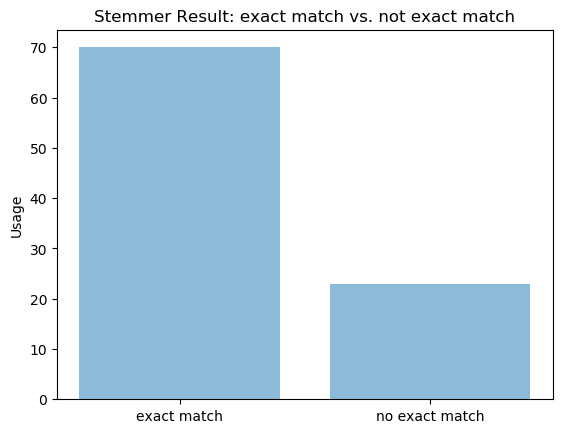

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('exact match', 'no exact match')
y_pos = np.arange(len(objects))
performance = [len(exact), len(diff)]

# create plot
fig, ax = plt.subplots()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Stemmer Result: exact match vs. not exact match')
 
plt.show()



## Checking those in the not exact match to determine if thos outputted stems are valid morphological roots of the corresponding words:

**Valid morphological roots list: 10**
    
[u'turn', 'turning']
[u'contain', 'containing'] 
[u'collect', 'collection']
[u'chamberpot', 'chamberpots']
['when', 'When']
[u'close', 'closely']
[u'vanish', 'vanished']
['but', 'But']
[u'access', 'accessible']
[u'except', 'exceptionally']]

**Not valid morphological roots list: 13**
    
[u'beauti', 'beautifully'] 
[u'proport', 'proportioned']
[u'befor', 'before']
[u'realli', 'really']
[u'magnific', 'magnificent']
[u'investig', 'investigate']
[u'discov', 'discovered']
[u'possibl', 'Possibly']
[u'onli', 'only']
[u'thirti', 'thirty']
[u'morn', 'morning']
[u'onli', 'only']
[u'ha', 'has']

In [15]:
# result of valid morphological roots 

valid_morphological_pct = (len(exact) + 13)/len(tokenized_text_flatten)

print ("Percentage of outputted stems that are valid morphological roots of the corresponding words: " + "{:.2%}".format(valid_morphological_pct)) 


Percentage of outputted stems that are valid morphological roots of the corresponding words: 89.25%


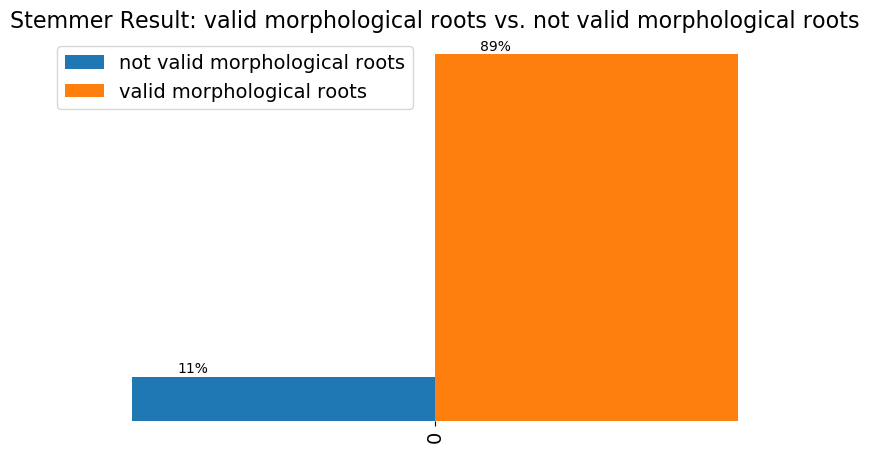

In [16]:

# put the result into a dataframe
result = pd.DataFrame({"valid morphological roots": [83], "not valid morphological roots": [10]})

# Change this line to plot percentages instead of absolute values
ax = (result.div(result.sum(1), axis=0)).plot(kind='bar',figsize=(10,5),width = 1.8,edgecolor=None)
plt.legend(labels=result.columns,fontsize= 14)
plt.title("Stemmer Result: valid morphological roots vs. not valid morphological roots",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))

plt.show()